# FIFA EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf

In [3]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

## Loading the data

In [4]:
worldcup=pd.read_csv("WorldCups.csv")
players=pd.read_csv("WorldCupPlayers.csv")
matches=pd.read_csv("WorldCupMatches.csv")

In [5]:
worldcup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [6]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


## Data Cleaning

In [8]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [10]:
matches.dropna(subset=["Year"],inplace=True)

In [11]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [12]:
matches["Home Team Name"].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [13]:
names=matches[matches["Home Team Name"].str.contains('rn">')]["Home Team Name"].value_counts()
names

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [14]:
names.index

Index(['rn">Republic of Ireland', 'rn">United Arab Emirates',
       'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina'],
      dtype='object')

In [15]:
wrong_name=list(names.index)
wrong_name

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [16]:
right=[x.split(">")[1] for x in wrong_name]
right

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [17]:
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [18]:
wrong_name=wrong_name+old
right=right+new

In [19]:
for index,wr in enumerate(wrong_name):
    worldcup=worldcup.replace(wrong_name[index],right[index])
for index,wr in enumerate(wrong_name):
    matches=matches.replace(wrong_name[index],right[index])
for index,wr in enumerate(wrong_name):
    players=players.replace(wrong_name[index],right[index])

In [66]:
names=matches[matches["Home Team Name"].str.contains('rn">')]["Home Team Name"].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

Now all the wrong values are changes

## Most number of World Cup Title

In [21]:
winner=worldcup["Winner"].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [22]:
runner_up=worldcup["Runners-Up"].value_counts()
runner_up

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [67]:
third=worldcup["Third"].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [68]:
victory=pd.concat([winner,runner_up,third],axis=1)
victory.fillna(0,inplace=True)
victory=victory.astype("int")
victory

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [25]:
victory.iplot(kind="bar",xTitle="Team",yTitle="No of Times",title="FIFA Champions")

## No of Goal per Country

In [26]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [27]:
home=matches.loc[:,["Home Team Name","Home Team Goals"]]
home

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [28]:
away=matches.loc[:,["Away Team Name","Away Team Goals"]]
away

,Away Team Name,Away Team Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0
...,...,...
847,Costa Rica,0.0
848,Germany,7.0
849,Argentina,0.0
850,Netherlands,3.0


In [29]:
home=home.rename(columns={"Home Team Name":"Team","Home Team Goals":"Goals"})
away=away.rename(columns={"Away Team Name":"Team","Away Team Goals":"Goals"})

In [30]:
home

,Team,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [31]:
away

,Team,Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0
...,...,...
847,Costa Rica,0.0
848,Germany,7.0
849,Argentina,0.0
850,Netherlands,3.0


In [32]:
home.append(away,ignore_index=True)

,Team,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


In [33]:
temp=home.append(away,ignore_index=True).groupby("Team").agg(TotalGoals=("Goals","sum")).sort_values(by="TotalGoals",ascending=False)
temp

,TotalGoals
Team,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [34]:
temp.iloc[:20,:].iplot(kind="bar",xTitle="Teams",yTitle="No of Goals",title="Most goals by a country")

## Attendance , Number of Teams , Goals and Matches per Cup

In [35]:
worldcup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [36]:
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


Remove the . from 'Attendance"

In [37]:
worldcup["Attendance"]=worldcup["Attendance"].str.replace(".","")

C:\Users\Magesh\AppData\Local\Temp\ipykernel_11248\3451740055.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [38]:
worldcup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


In [39]:
worldcup["Attendance"]=worldcup["Attendance"].str.strip()

In [40]:
worldcup["Attendance"]=worldcup["Attendance"].astype("float").astype("Int64")
worldcup["Attendance"]

0      590549
1      363000
2      375700
3     1045246
4      768607
5      819810
6      893172
7     1563135
8     1603975
9     1865753
10    1545791
11    2109723
12    2394031
13    2516215
14    3587538
15    2785100
16    2705197
17    3359439
18    3178856
19    3386810
Name: Attendance, dtype: Int64

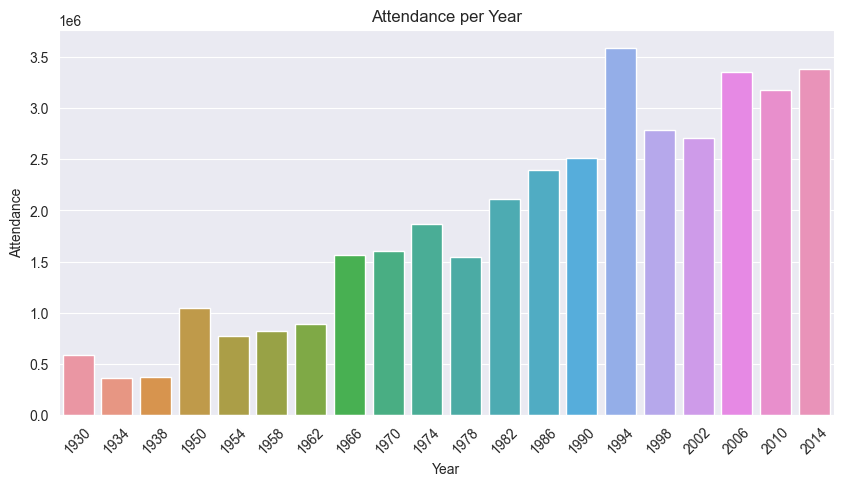

In [41]:
fig,ax=plt.subplots(figsize=(10,5))
g=sns.barplot(data=worldcup,x="Year",y="Attendance")
g.set_xticklabels(labels=g.get_xticklabels(),rotation=45)
plt.title("Attendance per Year")
plt.show()

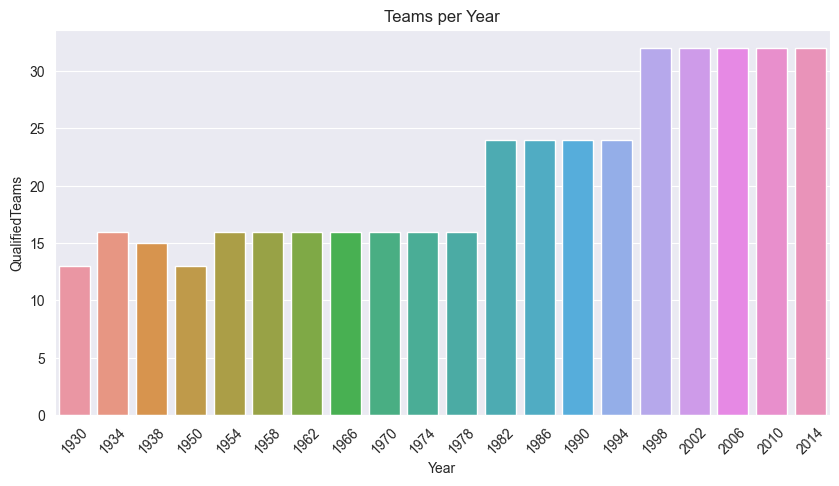

In [42]:
fig,ax=plt.subplots(figsize=(10,5))
g=sns.barplot(data=worldcup,x="Year",y="QualifiedTeams")
g.set_xticklabels(labels=g.get_xticklabels(),rotation=45)
plt.title("Teams per Year")
plt.show()

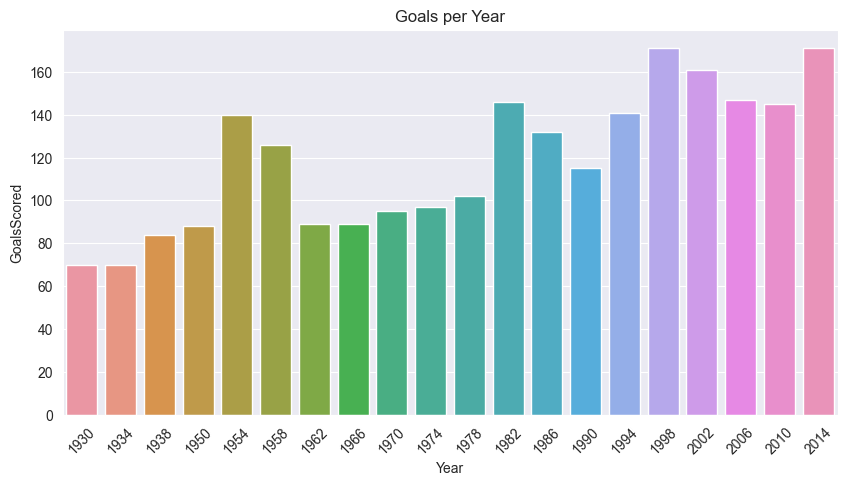

In [43]:
fig,ax=plt.subplots(figsize=(10,5))
g=sns.barplot(data=worldcup,x="Year",y="GoalsScored")
g.set_xticklabels(labels=g.get_xticklabels(),rotation=45)
plt.title("Goals per Year")
plt.show()

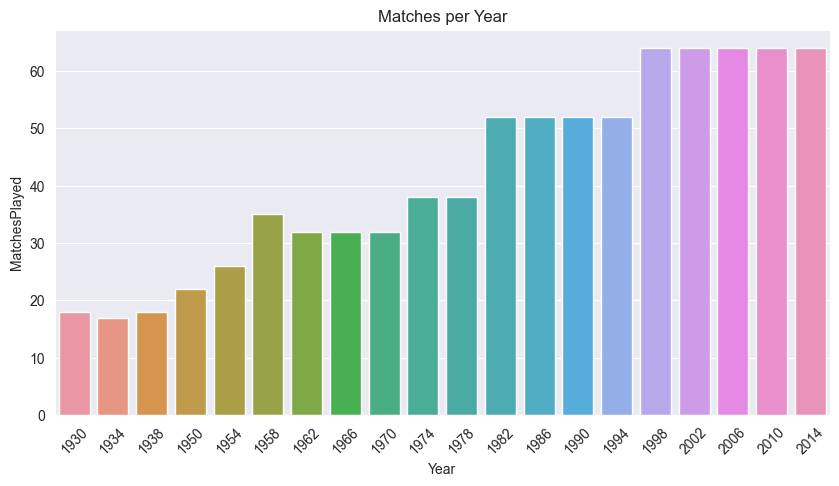

In [44]:
fig,ax=plt.subplots(figsize=(10,5))
g=sns.barplot(data=worldcup,x="Year",y="MatchesPlayed")
g.set_xticklabels(labels=g.get_xticklabels(),rotation=45)
plt.title("Matches per Year")
plt.show()

## No of goals by Teams per Year

In [45]:
home=matches.groupby(["Year","Home Team Name"]).agg(home_goals=("Home Team Goals","sum"))
home

home_goals
Year   Home Team Name            
1930.0 Argentina             16.0
       Brazil                 4.0
       Chile                  4.0
       France                 4.0
       Paraguay               1.0
...                           ...
2014.0 Russia                 1.0
       Spain                  1.0
       Switzerland            4.0
       USA                    2.0
       Uruguay                3.0

[366 rows x 1 columns]

In [46]:
away=matches.groupby(["Year","Away Team Name"]).agg(away_goals=("Away Team Goals","sum"))
away

away_goals
Year   Away Team Name            
1930.0 Argentina              2.0
       Belgium                0.0
       Bolivia                0.0
       Brazil                 1.0
       Chile                  1.0
...                           ...
2014.0 Russia                 1.0
       Spain                  3.0
       Switzerland            3.0
       USA                    4.0
       Uruguay                1.0

[411 rows x 1 columns]

In [47]:
temp=pd.concat([home,away],axis=1).reset_index()
temp=temp.fillna(0)
temp["Goals"]=temp["home_goals"]+temp["away_goals"]
temp=temp.drop(["home_goals","away_goals"],axis=1)

In [48]:
temp=temp.rename(columns={"level_1":"Team"})
temp=temp.sort_values(by=["Year","Goals"],ascending=[True,False]).reset_index(drop=True)
temp

,Year,Team,Goals
0,1930.0,Argentina,18.0
1,1930.0,Uruguay,15.0
2,1930.0,USA,7.0
3,1930.0,Yugoslavia,7.0
4,1930.0,Brazil,5.0
...,...,...,...
422,2014.0,Japan,2.0
423,2014.0,Russia,2.0
424,2014.0,Cameroon,1.0
425,2014.0,Honduras,1.0


In [49]:
temp=temp.groupby("Year").head(5)
temp

,Year,Team,Goals
0,1930.0,Argentina,18.0
1,1930.0,Uruguay,15.0
2,1930.0,USA,7.0
3,1930.0,Yugoslavia,7.0
4,1930.0,Brazil,5.0
...,...,...,...
395,2014.0,Germany,29.0
396,2014.0,Netherlands,20.0
397,2014.0,Brazil,15.0
398,2014.0,Colombia,15.0


## Matches with High Atteendance

In [50]:
temp=matches.sort_values(by="Attendance",ascending=False).loc[:10,["Datetime","Home Team Name","Away Team Name","Attendance"]].reset_index(drop=True).iloc[:10,:]
temp

,Datetime,Home Team Name,Away Team Name,Attendance
0,16 Jul 1950 - 15:00,Uruguay,Brazil,173850.0
1,13 Jul 1950 - 15:00,Brazil,Spain,152772.0
2,01 Jul 1950 - 15:00,Brazil,Yugoslavia,142429.0
3,09 Jul 1950 - 15:00,Brazil,Sweden,138886.0
4,07 Jun 1986 - 12:00,Mexico,Paraguay,114600.0
5,29 Jun 1986 - 12:00,Argentina,Germany,114600.0
6,15 Jun 1986 - 12:00,Mexico,Bulgaria,114580.0
7,22 Jun 1986 - 12:00,Argentina,England,114580.0
8,25 Jun 1986 - 16:00,Argentina,Belgium,114500.0
9,03 Jun 1986 - 12:00,Belgium,Mexico,110000.0


In [51]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        10 non-null     object 
 1   Home Team Name  10 non-null     object 
 2   Away Team Name  10 non-null     object 
 3   Attendance      10 non-null     float64
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


In [52]:
temp["Datetime"]=pd.to_datetime(temp["Datetime"],infer_datetime_format=True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Datetime        10 non-null     datetime64[ns]
 1   Home Team Name  10 non-null     object        
 2   Away Team Name  10 non-null     object        
 3   Attendance      10 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 448.0+ bytes


In [53]:
temp["vs"]=temp["Home Team Name"]+" vs "+temp["Away Team Name"]
temp["Year"]=temp["Datetime"].dt.year
for i,j in enumerate(temp["Year"]):
    temp.loc[i,["vs"]]=temp.loc[i,["vs"]]+" ["+str(j)+"]"

In [54]:
temp

,Datetime,Home Team Name,Away Team Name,Attendance,vs,Year
0,1950-07-16 15:00:00,Uruguay,Brazil,173850.0,Uruguay vs Brazil [1950],1950
1,1950-07-13 15:00:00,Brazil,Spain,152772.0,Brazil vs Spain [1950],1950
2,1950-07-01 15:00:00,Brazil,Yugoslavia,142429.0,Brazil vs Yugoslavia [1950],1950
3,1950-07-09 15:00:00,Brazil,Sweden,138886.0,Brazil vs Sweden [1950],1950
4,1986-06-07 12:00:00,Mexico,Paraguay,114600.0,Mexico vs Paraguay [1986],1986
5,1986-06-29 12:00:00,Argentina,Germany,114600.0,Argentina vs Germany [1986],1986
6,1986-06-15 12:00:00,Mexico,Bulgaria,114580.0,Mexico vs Bulgaria [1986],1986
7,1986-06-22 12:00:00,Argentina,England,114580.0,Argentina vs England [1986],1986
8,1986-06-25 16:00:00,Argentina,Belgium,114500.0,Argentina vs Belgium [1986],1986
9,1986-06-03 12:00:00,Belgium,Mexico,110000.0,Belgium vs Mexico [1986],1986


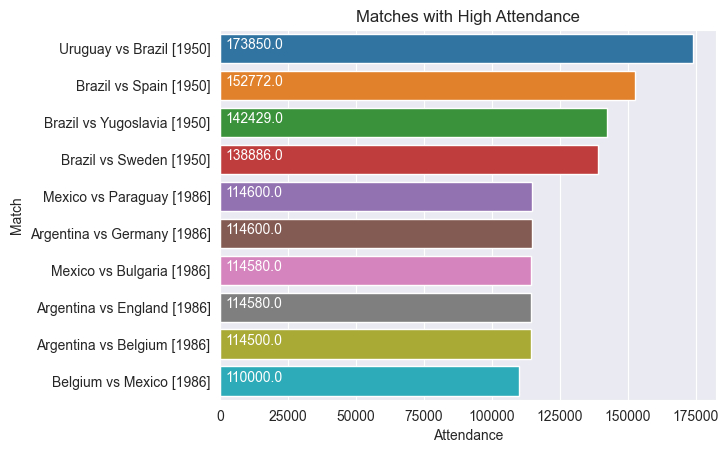

In [55]:
ax=sns.barplot(data=temp,y="vs",x="Attendance")
ax.set_ylabel("Match")
ax.set_title("Matches with High Attendance")
for i,j in enumerate(temp["Attendance"]):
    ax.text(2000,i,j,color="white",ha="left")

## Stadium with high Average Attendance

In [56]:
temp=matches.groupby(["Stadium","City"],as_index=False).agg(Attendance=("Attendance","mean")).sort_values(by="Attendance",ascending=False).reset_index(drop=True)
temp=temp.iloc[:10,:]
temp

,Stadium,City,Attendance
0,Estadio Azteca,Mexico City,100923.684211
1,Rose Bowl,Los Angeles,92600.875000
2,Wembley Stadium,London,86448.222222
3,Maracanã Stadium,Rio De Janeiro,86417.333333
4,Soccer City Stadium,Johannesburg,83857.375000
5,Santiago Bernabeu,Madrid,82522.250000
6,Stanford Stadium,San Francisco,81737.333333
7,Stade de France,Saint-Denis,78222.222222
8,Giants Stadium,New York/New Jersey,73689.714286
9,Stadio Olimpico,Rome,73373.000000


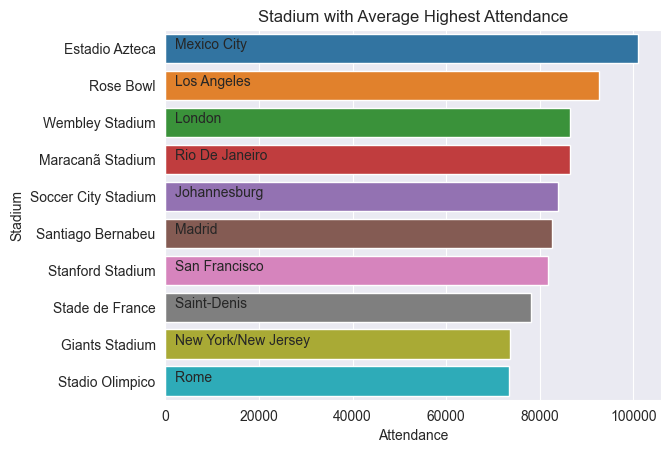

In [57]:
ax=sns.barplot(x=temp["Attendance"],y=temp["Stadium"])
ax.set_title("Stadium with Average Highest Attendance")
for i,j in enumerate(temp["City"]):
    ax.text(2000,i,j)

## City with Most Matches

In [58]:
matches["City"].value_counts().iloc[:20]

Mexico City           23
Montevideo            18
Rio De Janeiro        18
Guadalajara           17
Johannesburg          15
Sao Paulo             14
Buenos Aires          12
Munich                11
Leon                  11
Belo Horizonte        11
Gelsenkirchen         10
Stuttgart             10
Dortmund              10
Frankfurt/Main        10
London                10
Santiago De Chile     10
Brasilia              10
Rome                   9
Bordeaux               9
Marseilles             9
Name: City, dtype: int64

In [59]:
matches["City"].value_counts().iloc[:20].iplot(kind="bar",xTitle="City",yTitle="No of Matches",title="Most matches held in a City")

## Outcome based on Home or Away Team

In [60]:
def check(temp):
    if temp["Home Team Goals"]>temp["Away Team Goals"]:
        return "Home"
    elif temp["Home Team Goals"]<temp["Away Team Goals"]:
        return "Away"
    else:
        return "Draw"


In [61]:
matches["Outcome"]=matches.apply(check,axis=1)

In [62]:
temp=matches["Outcome"].value_counts()
temp

Home    488
Draw    190
Away    174
Name: Outcome, dtype: int64

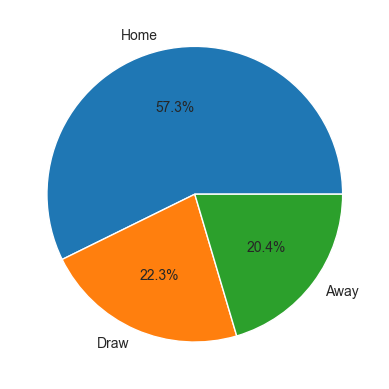

In [63]:
plt.pie(labels=temp.index.values,x=temp.values,autopct="%1.1f%%")
plt.show()